Importamos las librerías que vayamos a ocupar

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from scipy import stats as st

Añadimos los archivos

In [3]:
df_1 = pd.read_csv('Notebook/moved_project_sql_result_01.csv')
df_1.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


Revisamos sus datos 

In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


Graficamos los datos:

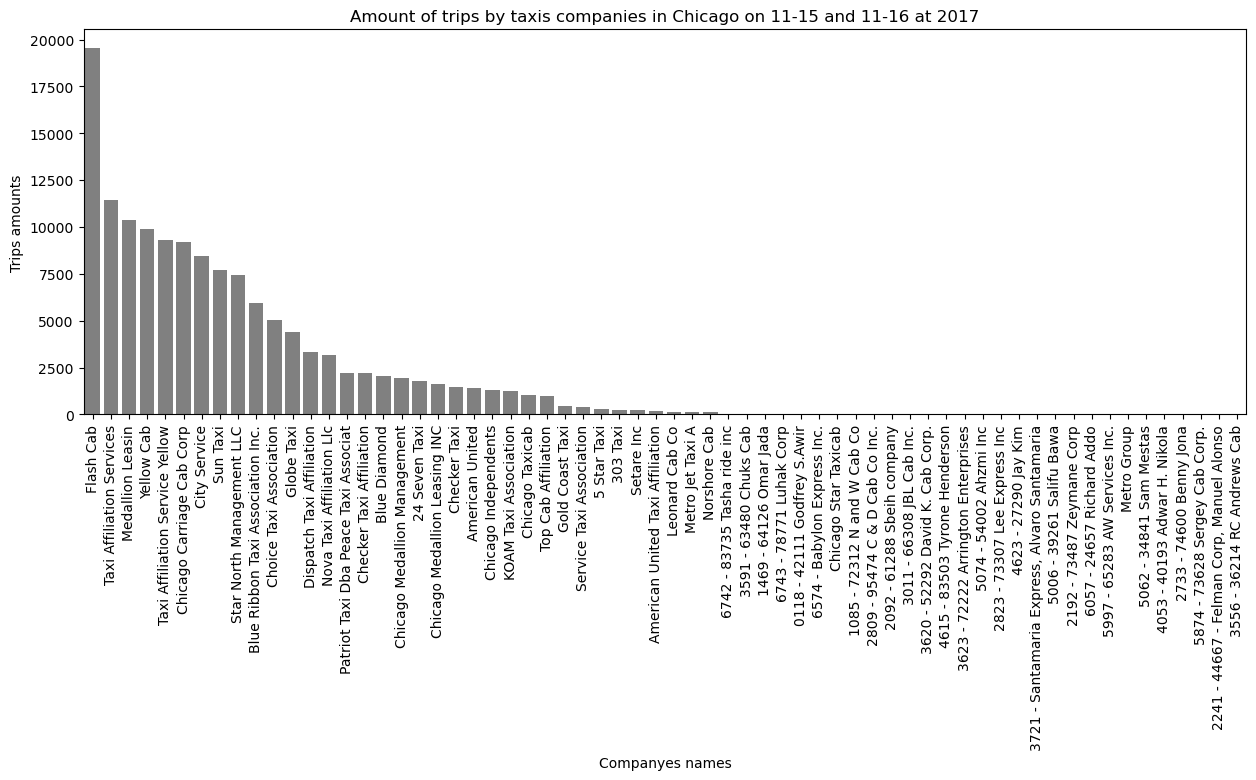

In [5]:
plt.figure(figsize=(15, 5))

sns.barplot(data = df_1,
            x = 'company_name',
            y = 'trips_amount',
            color = 'gray'
           )
plt.title('Amount of trips by taxis companies in Chicago on 11-15 and 11-16 at 2017')
plt.xlabel('Companyes names')
plt.ylabel('Trips amounts')
plt.xticks(rotation=90)
plt.show()

### Conclusión del gráfico "Amount of trips by taxis companies in Chicago on 11-15 and 11-16 at 2017":

La empresa Flash Cab dominó el mercado esos dos días, debe de ser una empresa muy grande para cubrir la demanda de casi 20,000 mil viajes en dos días, debe tener al menos 2,000 vehículos afiliados a su empresa.
Las siguientes 13 empresas van en orden descendente por una direfencia de no más de 2,000 viajes.
El resto son empresas pequeñas.


In [6]:
df_4 = pd.read_csv('Notebook/moved_project_sql_result_04.csv')
df_4.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [7]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Sacamos nuestras 10 barrios más recurrentes:

In [8]:
top_ten_neightborhoods = df_4.head(10)
top_ten_neightborhoods 


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


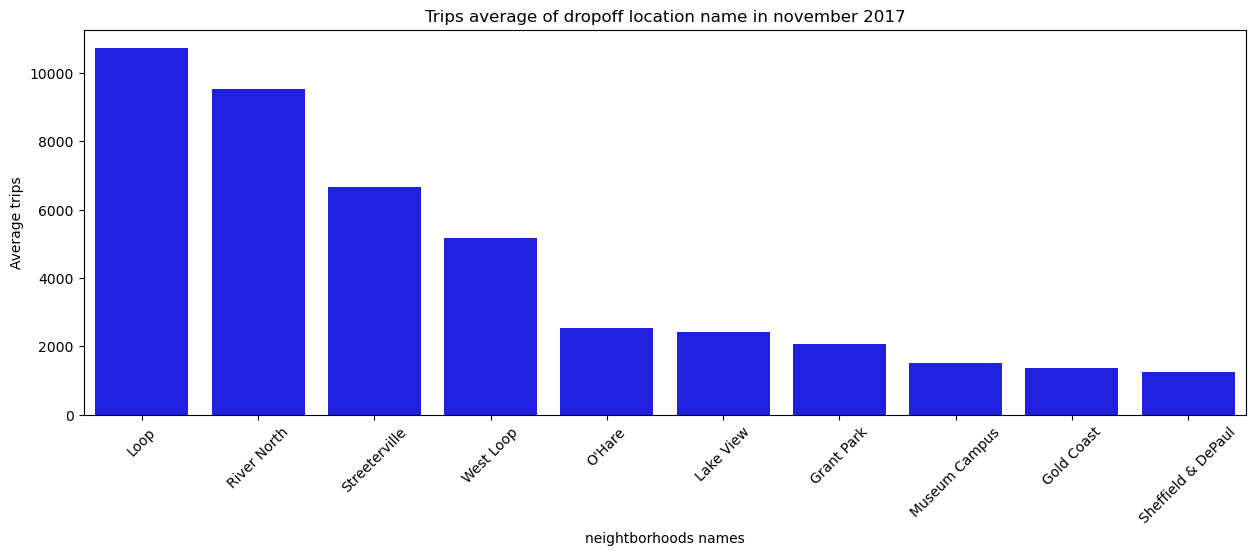

In [9]:
plt.figure(figsize=(15, 5))

sns.barplot(data = top_ten_neightborhoods ,
            x = 'dropoff_location_name',
            y = 'average_trips',
            color = 'blue'
           )
plt.title('Trips average of dropoff location name in november 2017')
plt.xlabel('neightborhoods names')
plt.ylabel('Average trips')
plt.xticks(rotation=45)
plt.show()

### Conclusiones del gráfico 'Trips average of dropoff location name':

El barrio más recurrente para dejar personas es el barrio de "Loop" con un promedio de 10,727 dejadas en el mes de noviembre.
El segundo barrio "River North" solo hay una diferencia frente al barrio "Loop" de aproximadamente 1,200 dejadas.
Los siguientes barrios utilizan menos taxis que los primeros dos, sin embargo, sigue siendo un monto considerable de dejadas entre 6,000, 5,000 y así va decendiendo.


# Prueba de hipótesis para el archivo de resultados 7

Importamos los datos y damos revisión de los tipos de datos

In [10]:
df_7 = pd.read_csv('Notebook/moved_project_sql_result_07.csv')
df_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Usaremos la prueba de hipótesis de la duración promedio de los viajes desde Loop hasta el aeropuerto Internacional de O'Hare
- H0: La duración promedio de los viajes desde Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos.
- H1: La duración promedio de los viajes desde Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.
- Nivel de confianza $\alpha = 0.05$

In [11]:
# Nuestra tabla con sábados lluviosos
raining_saturdays = df_7[df_7['weather_conditions'] == 'Bad']
raining_saturdays_time = raining_saturdays['duration_seconds']
raining_saturdays_time

6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 180, dtype: float64

In [12]:
# nuestra tabala con sábados de buen clima
saturdays = df_7[df_7['weather_conditions'] == 'Good']
saturdays_time = saturdays['duration_seconds']
saturdays_time

0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1062    1500.0
1063       0.0
1064    1318.0
1065    2100.0
1066    1380.0
Name: duration_seconds, Length: 888, dtype: float64

In [13]:
# Calculamos la hipótesis 

alpha = 0.05
results = st.ttest_ind(raining_saturdays_time, saturdays_time, equal_var = False)
print('Valor p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Valor p: 6.738994326108734e-12
Rechazamos la hipótesis nula


Para reforzar la explicación del resultado, haremos una gráfica del promedio del tiempo que toma llegar en cada situción.

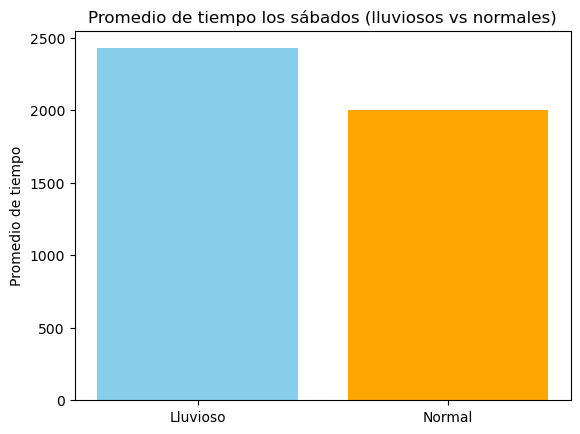

In [14]:
mean_rain = raining_saturdays_time.mean()
mean_no_rain = saturdays_time.mean()

df_means = pd.DataFrame({
    'Tipo de sábado': ['Lluvioso', 'Normal'],
    'Promedio (segundos)': [mean_rain, mean_no_rain]})

plt.bar(df_means['Tipo de sábado'], df_means['Promedio (segundos)'], color=['skyblue', 'orange'])
plt.title('Promedio de tiempo los sábados (lluviosos vs normales)')
plt.ylabel('Promedio de tiempo')
plt.show()

## Resultados:
La hipóteisis nula ha sido rechazada, esto nos quiere decir que si hay una diferencia considerable entre el promedio de tiempo que toma llegar desde el barrio Loop al Aeropuerto Internacional de O'Hare en sábados lluviosos que en sábados con uen clima, como vemos en la gráfica los sábados lluviosos es más tardado que los sábados normales.